In [1]:
import sys, os
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import astropy
import shutil
import pyoperon as Operon
from iminuit import Minuit
from iminuit.cost import LeastSquares
import seaborn as sns
from os import listdir
from os.path import isfile, join
from scipy.optimize import curve_fit

sys.path.append('../')
import mvsr as mvsr
import analysis as ana

import generate_data_market as gdm

## Format the data

The data used is available here: https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset

For this script the data was downloaded and splitted into individual .csv files stored in the "data_market/all_companies" folder

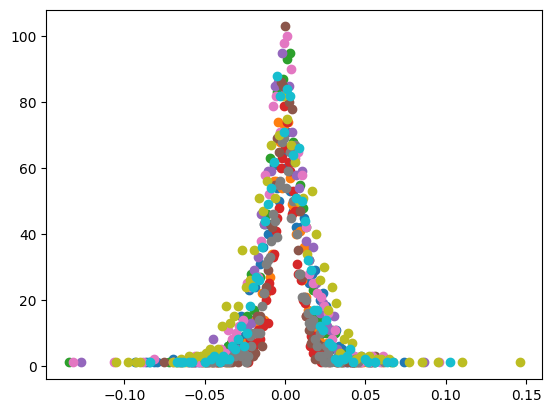

In [2]:
folder = "data_market/examples"
onlyfiles = [f for f in listdir("data_market/all_companies") if isfile(join("data_market/all_companies", f))]


# Delete and recreate folder
if os.path.exists(f"{folder}"):
    shutil.rmtree(f"{folder}")
os.makedirs(f"{folder}")

for i in range(10):
    data = pd.read_csv(f"data_market/all_companies/{onlyfiles[i]}")
    data['Open'] = data['Open']/data['Open'].max()
    diffs = (np.array(data['Open'][1:]) - np.array(data['Open'][:-1]))
    diffs = diffs[diffs==diffs]
    
    hist, bins = np.histogram(diffs, bins=100);
    x, y = bins[:-1], hist

    mask = y > 0
    x, y = x[mask], y[mask]

    plt.scatter(x, y)
    ana.save_2D_example(x, y, f'{folder}/example{i}.csv')

## Generate Gaussian

In [10]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=8, maxD=3, generations=1000, seed=5,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Exp, verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = A*exp(-B*X1**2)


## Generate Laplace

In [4]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=8, maxD=3, generations=1000, seed=11,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Exp, verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = A*exp(-B*Abs(X1))


## Generate Linear-Laplace

In [3]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=8, maxD=3, generations=1000, seed=1,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Exp, verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = (A - B*X1)*exp(-C*Abs(X1))


## Generate Exp-Laplace

In [70]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=8, maxD=3, generations=1000, seed=6,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Exp|Operon.NodeType.Pow,
                                              verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = A*exp(-B*X1 - C*Abs(X1))


## Generate Power-Laplace

In [97]:
agg_best_str, all_best_str = mvsr.MultiViewSR(folder, maxL=7, maxD=3, generations=3000, seed=2,
                                              OperationSet=Operon.NodeType.Abs|Operon.NodeType.Exp|Operon.NodeType.Pow,
                                              verbose=False, explicit_params=False)

func, func_str, initial_guess = ana.convert_string_to_func(agg_best_str, 1)
print("f(X1) =", func_str)

f(X1) = A*exp(-B*Abs(X1)**C)


# ______________________________________________________________________________

[0.9458236481402167,
 0.943580704973069,
 0.9733744924382243,
 0.9747207807378255,
 0.9513874599745483,
 0.9688213047662092,
 0.9693595914199828,
 0.9335327172118322,
 0.9499017823460925,
 0.9543493713104374]

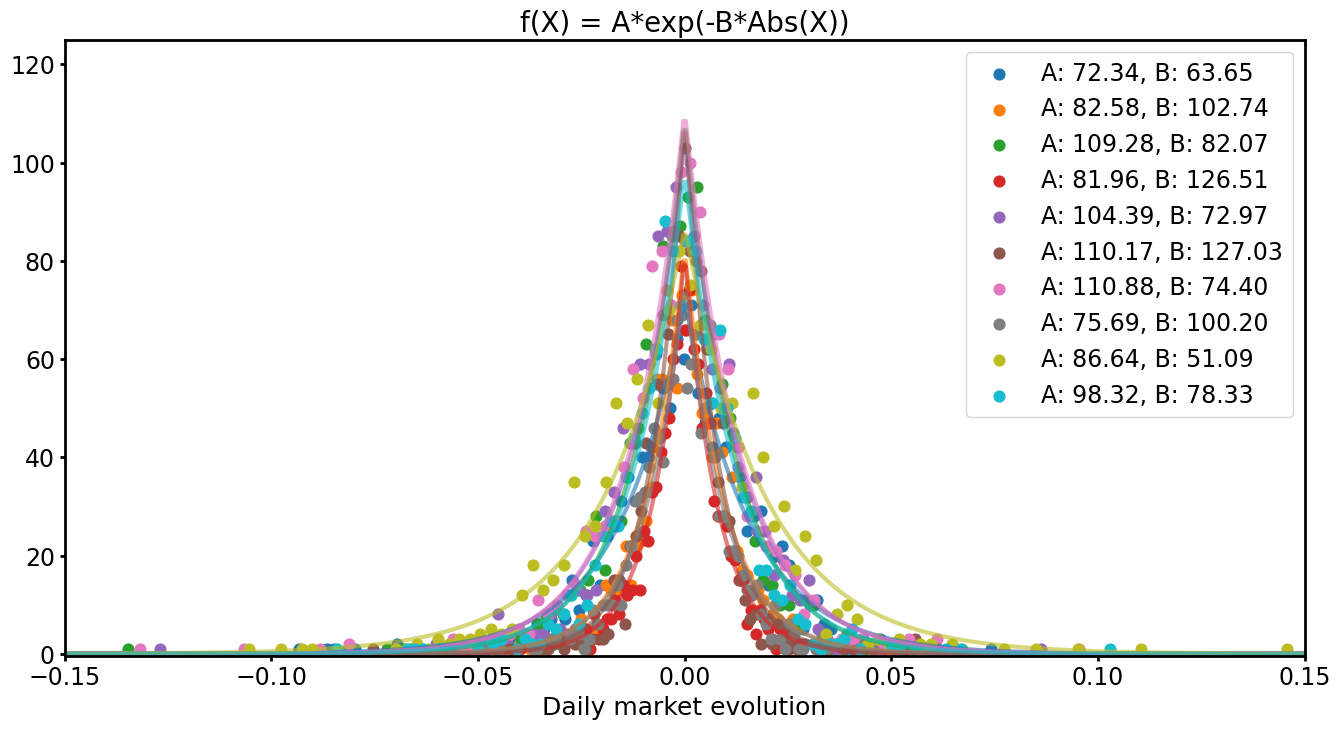

In [5]:
ana.refit_and_plot(folder, func, func_str, initial_guess,
                   [-0.15, 0.15], [-0.4, 125],
                   ['Daily market evolution', ''],
                   folder[:folder.find('/')])

The code used to generate the plot presented in the paper is inside data_market/generate_plot.py.

It is also used to generate the table with the mean MSE